<a href="https://colab.research.google.com/github/MomotaAhsanaMeem/Dengue-Prediction/blob/main/dengue2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the uploaded dataset to inspect its structure
file_path = '/content/drive/MyDrive/Dengue/dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1400 non-null   int64  
 1   Gender                       1400 non-null   object 
 2   Age                          1400 non-null   int64  
 3   Hemoglobin(g/dl)             1400 non-null   float64
 4   Neutrophils(%)               1400 non-null   int64  
 5   Lymphocytes(%)               1400 non-null   int64  
 6   Monocytes(%)                 1400 non-null   int64  
 7   Eosinophils(%)               1400 non-null   int64  
 8   RBC                          1400 non-null   int64  
 9   HCT(%)                       1400 non-null   float64
 10  MCV(fl)                      1400 non-null   float64
 11  MCH(pg)                      1400 non-null   float64
 12  MCHC(g/dl)                   1400 non-null   float64
 13  RDW-CV(%)         

(   Unnamed: 0  Gender  Age  Hemoglobin(g/dl)  Neutrophils(%)  Lymphocytes(%)  \
 0           0    Male   21              14.8              48              47   
 1           1    Male   30              15.0              47              49   
 2           2    Male   51              16.3              41              48   
 3           3  Female   26              12.3              46              49   
 4           4    Male   35              16.1              45              46   
 
    Monocytes(%)  Eosinophils(%)  RBC  HCT(%)  MCV(fl)  MCH(pg)  MCHC(g/dl)  \
 0             3               2    5   48.00     96.0    29.60        30.8   
 1             6               3    5   49.80     96.1    28.40        29.5   
 2             4               5    5   50.10     93.5    31.30        32.7   
 3             7               5    5   44.00     90.0    30.50        30.5   
 4             4               4    5   50.53     91.0    29.12        29.2   
 
    RDW-CV(%)  Total Platelet Count(

In [ ]:
# for the test dataset
file_path = '/content/drive/MyDrive/Dengue/dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1400 non-null   int64  
 1   Gender                       1400 non-null   object 
 2   Age                          1400 non-null   int64  
 3   Hemoglobin(g/dl)             1400 non-null   float64
 4   Neutrophils(%)               1400 non-null   int64  
 5   Lymphocytes(%)               1400 non-null   int64  
 6   Monocytes(%)                 1400 non-null   int64  
 7   Eosinophils(%)               1400 non-null   int64  
 8   RBC                          1400 non-null   int64  
 9   HCT(%)                       1400 non-null   float64
 10  MCV(fl)                      1400 non-null   float64
 11  MCH(pg)                      1400 non-null   float64
 12  MCHC(g/dl)                   1400 non-null   float64
 13  RDW-CV(%)         

(   Unnamed: 0  Gender  Age  Hemoglobin(g/dl)  Neutrophils(%)  Lymphocytes(%)  \
 0           0    Male   21              14.8              48              47   
 1           1    Male   30              15.0              47              49   
 2           2    Male   51              16.3              41              48   
 3           3  Female   26              12.3              46              49   
 4           4    Male   35              16.1              45              46   
 
    Monocytes(%)  Eosinophils(%)  RBC  HCT(%)  MCV(fl)  MCH(pg)  MCHC(g/dl)  \
 0             3               2    5   48.00     96.0    29.60        30.8   
 1             6               3    5   49.80     96.1    28.40        29.5   
 2             4               5    5   50.10     93.5    31.30        32.7   
 3             7               5    5   44.00     90.0    30.50        30.5   
 4             4               4    5   50.53     91.0    29.12        29.2   
 
    RDW-CV(%)  Total Platelet Count(

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Dengue/dataset.csv'
data = pd.read_csv(file_path)

# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 0'], errors='ignore')

# Encode 'Gender' (Male: 0, Female: 1)
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Encode 'Result' (positive: 1, negative: 0)
data['Result'] = data['Result'].map({'positive': 1, 'negative': 0})

# Feature engineering: Create new columns
data['Neutrophils_Lymphocytes_Ratio'] = data['Neutrophils(%)'] / data['Lymphocytes(%)']
data['Platelet_WBC_Ratio'] = data['Total Platelet Count(/cumm)'] / data['Total WBC count(/cumm)']
data['HCT_Hemoglobin_Ratio'] = data['HCT(%)'] / data['Hemoglobin(g/dl)']
data['RDW_MCV_Ratio'] = data['RDW-CV(%)'] / data['MCV(fl)']

# Reorder columns for better readability
columns_order = [
    'Age', 'Gender', 'Hemoglobin(g/dl)', 'Neutrophils(%)', 'Lymphocytes(%)',
    'Neutrophils_Lymphocytes_Ratio', 'Platelet_WBC_Ratio',
    'HCT_Hemoglobin_Ratio', 'RDW_MCV_Ratio', 'Result'
] + [col for col in data.columns if col not in [
    'Age', 'Gender', 'Hemoglobin(g/dl)', 'Neutrophils(%)', 'Lymphocytes(%)',
    'Neutrophils_Lymphocytes_Ratio', 'Platelet_WBC_Ratio',
    'HCT_Hemoglobin_Ratio', 'RDW_MCV_Ratio', 'Result'
]]

data = data[columns_order]

# Save the modified dataset
output_path = '/content/drive/MyDrive/Dengue/newDataset.csv'
data.to_csv(output_path, index=False)

print(f"Feature-engineered dataset saved to {output_path}")


Feature-engineered dataset saved to /content/drive/MyDrive/Dengue/newDataset.csv


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Dengue/newDataset.csv')
data.head()

,Age,Gender,Hemoglobin(g/dl),Neutrophils(%),Lymphocytes(%),Neutrophils_Lymphocytes_Ratio,Platelet_WBC_Ratio,HCT_Hemoglobin_Ratio,RDW_MCV_Ratio,Result,...,HCT(%),MCV(fl),MCH(pg),MCHC(g/dl),RDW-CV(%),Total Platelet Count(/cumm),MPV(fl),PDW(%),PCT(%),Total WBC count(/cumm)
0,21,0,14.8,48,47,1.021277,21.960784,3.243243,0.120833,1,...,48.00,96.0,29.60,30.8,11.6,112000,10.70,15.40,0.120,5100
1,30,0,15.0,47,49,0.959184,21.333333,3.320000,0.122789,1,...,49.80,96.1,28.40,29.5,11.8,96000,10.60,15.80,0.121,4500
2,51,0,16.3,41,48,0.854167,30.666667,3.073620,0.144385,0,...,50.10,93.5,31.30,32.7,13.5,184000,10.40,16.40,0.130,6000
3,26,1,12.3,46,49,0.938776,33.400000,3.577236,0.163333,0,...,44.00,90.0,30.50,30.5,14.7,167000,8.10,17.10,0.110,5000
4,35,0,16.1,45,46,0.978261,33.695652,3.138509,0.167033,0,...,50.53,91.0,29.12,29.2,15.2,155000,10.52,12.34,0.150,4600


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dengue/newDataset.csv')

# Display the first few rows of the dataset
print("Dataset Overview:")
print(data.head())

# Check for data structure and information
print("\nDataset Info:")
data.info()

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Overview:
   Age  Gender  Hemoglobin(g/dl)  Neutrophils(%)  Lymphocytes(%)  \
0   21       0              14.8              48              47   
1   30       0              15.0              47              49   
2   51       0              16.3              41              48   
3   26       1              12.3              46              49   
4   35       0              16.1              45              46   

   Neutrophils_Lymphocytes_Ratio  Platelet_WBC_Ratio  HCT_Hemoglobin_Ratio  \
0                       1.021277           21.960784              3.243243   
1                       0.959184           21.333333              3.320000   
2                       0.854167           30.666667              3.073620   
3                       0.938776           33.400000              3.577236   
4                       0.978261           33.695652              3.138509   

   RDW_MCV_Ratio  Result  ...  HCT(%)  MCV(fl)  MCH(pg)  MCHC(g/dl)  \
0       0.120833       1  ...   4

In [ ]:
# Fill missing values with the median
data.fillna(data.median(), inplace=True)

# Encode categorical columns
le_gender = LabelEncoder()
data['Gender'] = le_gender.fit_transform(data['Gender'])

le_result = LabelEncoder()
data['Result'] = le_result.fit_transform(data['Result'])

# Separate features (X) and target (y)
X = data.drop('Result', axis=1)  # 'Result' is the target column
y = data['Result']

# Normalize numerical features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nPreprocessing Complete!")



Preprocessing Complete!


In [ ]:
data.head()

,Age,Gender,Hemoglobin(g/dl),Neutrophils(%),Lymphocytes(%),Neutrophils_Lymphocytes_Ratio,Platelet_WBC_Ratio,HCT_Hemoglobin_Ratio,RDW_MCV_Ratio,Result,...,HCT(%),MCV(fl),MCH(pg),MCHC(g/dl),RDW-CV(%),Total Platelet Count(/cumm),MPV(fl),PDW(%),PCT(%),Total WBC count(/cumm)
0,21,0,14.8,48,47,1.021277,21.960784,3.243243,0.120833,1,...,48.00,96.0,29.60,30.8,11.6,112000,10.70,15.40,0.120,5100
1,30,0,15.0,47,49,0.959184,21.333333,3.320000,0.122789,1,...,49.80,96.1,28.40,29.5,11.8,96000,10.60,15.80,0.121,4500
2,51,0,16.3,41,48,0.854167,30.666667,3.073620,0.144385,0,...,50.10,93.5,31.30,32.7,13.5,184000,10.40,16.40,0.130,6000
3,26,1,12.3,46,49,0.938776,33.400000,3.577236,0.163333,0,...,44.00,90.0,30.50,30.5,14.7,167000,8.10,17.10,0.110,5000
4,35,0,16.1,45,46,0.978261,33.695652,3.138509,0.167033,0,...,50.53,91.0,29.12,29.2,15.2,155000,10.52,12.34,0.150,4600


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"\nTraining samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")



Training samples: 1120
Testing samples: 280


In [ ]:
# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("\nModel Training Complete!")



Model Training Complete!



Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.31      0.42        94
           1       0.73      0.92      0.81       186

    accuracy                           0.72       280
   macro avg       0.70      0.62      0.62       280
weighted avg       0.71      0.72      0.68       280



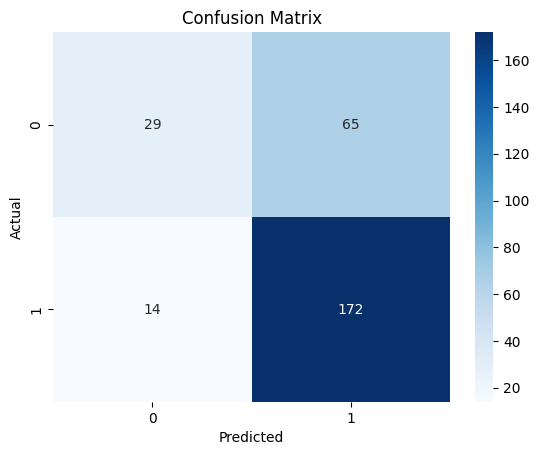

Accuracy: 71.79%


In [ ]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


In [ ]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
print(f"\nBest Parameters: {grid_search.best_params_}")

# Evaluate the optimized model
y_pred_optimized = best_model.predict(X_test)

# Optimized classification report
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_optimized))

# Optimized accuracy
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Accuracy: {accuracy_optimized * 100:.2f}%")


Fitting 3 folds for each of 81 candidates, totalling 243 fits

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.31      0.44        94
           1       0.73      0.95      0.82       186

    accuracy                           0.73       280
   macro avg       0.74      0.63      0.63       280
weighted avg       0.73      0.73      0.69       280

Optimized Accuracy: 73.21%


In [ ]:
# Load the test dataset (replace with the correct test dataset path)
test_data = pd.read_csv('/content/drive/MyDrive/Dengue/test_dataset.csv')
test_ids = test_data['ID']

# Display the test dataset to confirm it has an 'ID' column
print("Test Dataset Preview:")
print(test_data.head())


Test Dataset Preview:
     ID  Gender  Age  Hemoglobin(g/dl)  Neutrophils(%)  Lymphocytes(%)  \
0  1044    Male   20             14.60              45              42   
1  1383  Female   54             16.70              46              47   
2   739  Female   58             16.90              42              49   
3   445    Male   45             15.40              44              46   
4    14    Male   33             16.67              47              48   

   Monocytes(%)  Eosinophils(%)  RBC  HCT(%)  MCV(fl)  MCH(pg)  MCHC(g/dl)  \
0             3               2    4   39.01     83.9    28.30       34.70   
1             3               3    5   49.74     91.8    32.50       33.40   
2             2               4    5   41.75     95.1    34.00       32.20   
3             5               4    5   44.50     86.0    31.04       32.13   
4             3               4    6   51.15     99.0    30.65       31.70   

   RDW-CV(%)  Total Platelet Count(/cumm)  MPV(fl)  PDW(%)   PCT

In [ ]:
# Preprocess test data
# Drop ID column for predictions but keep it for the submission file
test_ids = test_data['ID']
test_data = test_data.drop(['ID'], axis=1)


In [ ]:
# Encode Gender in the test data
import numpy as np
test_data['Gender'] = test_data['Gender'].apply(lambda x: x if x in le_gender.classes_ else 'Unknown')
le_gender.classes_ = np.append(le_gender.classes_, 'Unknown')  # Append 'Unknown' to classes_
test_data['Gender'] = le_gender.transform(test_data['Gender'])


In [ ]:
# Ensure all columns match the training data

for col in data.drop(columns=['Result']).columns:
    if col not in test_data.columns:
        test_data[col] = 0  # Add missing columns with default value
test_data = test_data[data.drop(columns=['Result']).columns]  # Reorder columns to match training data


In [ ]:
# Predict probabilities for the test set
proba = model.predict_proba(test_data)
print(f"Predicted probabilities shape: {proba.shape}")

# Ensure test_data is a pandas DataFrame
if not isinstance(test_data, pd.DataFrame):
    test_data = pd.DataFrame(test_data)

# Ensure the shape is as expected
if proba.shape[1] >= 2:
    # Assign the probabilities of the positive class (class 1) to the TARGET column
    test_data['TARGET'] = proba[:, 1]  # Index 1 is for positive class probability
else:
    raise ValueError("Unexpected shape for predicted probabilities. Expected at least 2 classes.")

# Convert probabilities to binary labels (0 or 1) based on a threshold of 0.85
test_data['TARGET'] = (test_data['TARGET'] >= 0.5).astype(int)

# Combine the ID column with TARGET for submission
submission = pd.DataFrame({
    'ID': test_ids,
    'TARGET': test_data['TARGET']
})

# Save the submission file
submission_file_path = '/content/drive/My Drive/submission.csv'
submission.to_csv(submission_file_path, index=False)

print("\nSample of the submission file:")
print(submission.head())
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully!")

Predicted probabilities shape: (123, 2)

Sample of the submission file:
     ID  TARGET
0  1044       1
1  1383       1
2   739       1
3   445       1
4    14       1
Submission file created successfully!


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
